In [106]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
df_city = pd.read_csv(city_data_to_load)
df_ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df_pyber = df_ride.merge(df_city,how='left',on ='city',sort=True)

# Display the data table for preview
df_pyber.head()

,city,date,fare,ride_id,driver_count,type
0,Amandaburgh,2018-03-05 02:15:38,26.28,906850928986,12,Urban
1,Amandaburgh,2018-02-24 23:10:49,43.66,6573820412437,12,Urban
2,Amandaburgh,2018-02-10 20:42:46,36.17,6455620849753,12,Urban
3,Amandaburgh,2018-01-11 02:22:07,29.24,7279902884763,12,Urban
4,Amandaburgh,2018-01-21 04:12:54,9.26,5528427024492,12,Urban


## Bubble Plot of Ride Sharing Data

In [107]:
df_pyber['Total Number of Rider (Per City)'] = df_pyber.groupby(["city"])["ride_id"].transform(len)
df_pyber['Total Fares (Per City)'] = df_pyber.groupby(["city"])["fare"].transform(sum)
df_pyber['Average Fare ($)'] = df_pyber.groupby(["city"])["fare"].transform(sum)/df_pyber.groupby(["city"])["ride_id"].transform(len)
df_pyber_group = df_pyber.copy()



In [108]:
df_pyber_group = df_pyber_group.groupby(['type','city']).mean()
df_pyber_group = df_pyber_group.reset_index(drop=False)



No handles with labels found to put in legend.


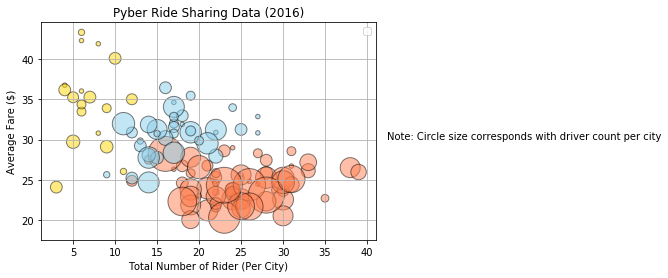

In [156]:
# Obtain the x and y coordinates for each of the three city types
df_pyber_rural = df_pyber_group[df_pyber_group.type == 'Rural']
df_pyber_urban = df_pyber_group[df_pyber_group.type == 'Urban']
df_pyber_suburban = df_pyber_group[df_pyber_group.type == 'Suburban']

# Build the scatter plots for each city types
ax = df_pyber_rural.plot.scatter(x='Total Number of Rider (Per City)', y = 'Average Fare ($)', \
                            legend = True, c = 'Gold', s = df_pyber_group['driver_count']*20, alpha = .5, edgecolor = 'black')

ax1 = df_pyber_urban.plot.scatter(x='Total Number of Rider (Per City)', y = 'Average Fare ($)', \
                            legend = True, c = 'Coral', s = df_pyber_group['driver_count']*20, ax = ax, alpha = .5, edgecolor = 'black')

ax2 = df_pyber_suburban.plot.scatter(x='Total Number of Rider (Per City)', y = 'Average Fare ($)', \
                            legend = True, c = 'SkyBlue', s = df_pyber_group['driver_count']*20, ax = ax, alpha = .5, edgecolor = 'black')
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid(True)

# Create a legend
ax.legend()

# Incorporate a text label regarding circle size
plt.text(75,30,'Note: Circle size corresponds with driver count per city',horizontalalignment='right')

# Save Figure

plt.savefig("PyberBubble.png")
plt.show()

## Total Fares by City Type

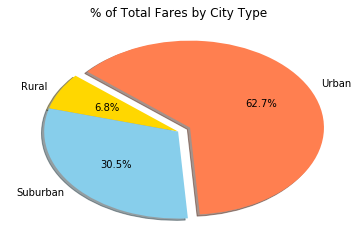

In [157]:
# Calculate Type Percents
df_pyber_piefare = df_ride.merge(df_city,how='left',on ='city',sort=True)
df_pyber_piefare = df_pyber_piefare.groupby(['type']).fare.sum()
total = df_pyber_piefare.sum()
pie_pctfare = [x/total for x in df_pyber_piefare]
type = ['Rural','Suburban','Urban']
explode = [0,0,.1]
colors = ['Gold','SkyBlue','Coral']
# Build Pie Chart
plt.pie(pie_pctfare, labels=type,explode = explode, colors = colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("TotalFarebyCity.png")
plt.show()

## Total Rides by City Type

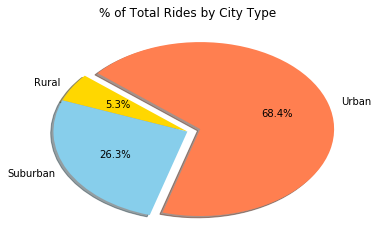

In [158]:
# Calculate Type Percents
df_pyber_pierides = df_ride.merge(df_city,how='left',on ='city',sort=True)
df_pyber_pierides = df_pyber_pierides.groupby(['type']).ride_id.count()
df_pyber_pierides
total2 = df_pyber_pierides.sum()
pie_pctrides = [x/total2 for x in df_pyber_pierides]
type = ['Rural','Suburban','Urban']
explode = [0,0,.1]
colors = ['Gold','SkyBlue','Coral']
#Build Pie Chart
plt.pie(pie_pctrides, labels=type,explode = explode, colors = colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("TotalRidesbyCity.png")
plt.show()

## Total Drivers by City Type

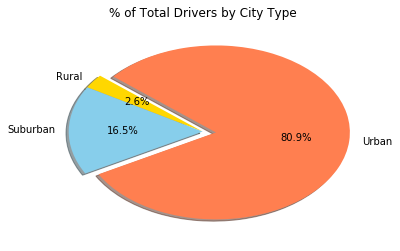

In [159]:
# Calculate Type Percents
df_pyber_piedrive = df_ride.merge(df_city,how='left',on ='city',sort=True)
df_pyber_piedrive = df_pyber_piedrive.drop_duplicates(subset='city')
df_pyber_piedrive = df_pyber_piedrive.groupby(['type']).driver_count.sum()
total3 = df_pyber_piedrive.sum()
pie_pctdrive = [x/total3 for x in df_pyber_piedrive]
type = ['Rural','Suburban','Urban']
explode = [0,0,.1]
colors = ['GOld','SkyBlue','Coral']
# Build Pie Chart
plt.pie(pie_pctdrive, labels=type,explode = explode, colors = colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("TotalDriversbyCity.png")
plt.show()

In [ ]:
#Three obsevable trends
1. Rural areas have the greatest variance in average fares
2. The more urban the area, the lower the average fare.
3. Urban drivers make up the lion share of drivers.
